In [26]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import chardet
import scrapy
import string
import nltk
import re
import langid
#import helper_functions
%run helper_functions.ipynb
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from forex_python.converter import CurrencyRates

In [27]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}


<IPython.core.display.Javascript object>

In [28]:
#Load the data from Fundrazr
fundrazr = pd.read_csv("crowdfunding_fundrazr/crowdfunding_fundrazr/data6.csv")


NUMBER OF COLUMNS IN DATASET: 10
**********************************************************************************************

NUMBER OF ROWS IN DATASET: 3147
**********************************************************************************************


COLUMN NAMES:
['amount_raised' 'campaign_title' 'currency_type' 'end_date' 'goal'
 'location' 'num_of_contributors' 'num_of_photos' 'story' 'url']
**********************************************************************************************

HERE ARE THE FIRST FIVE ROWS:
   amount_raised                                   campaign_title  \
0          290.0  Give Wyatt the Earth's colors for his birthday!   
1          279.0                          Help Garrett See Colors   
2          340.0                                      I need help   
3          310.0                 Help Brendan Tucker see colours!   
4          500.0         CIDP and Menieres Disease financial help   

       currency_type end_date     goal             loc

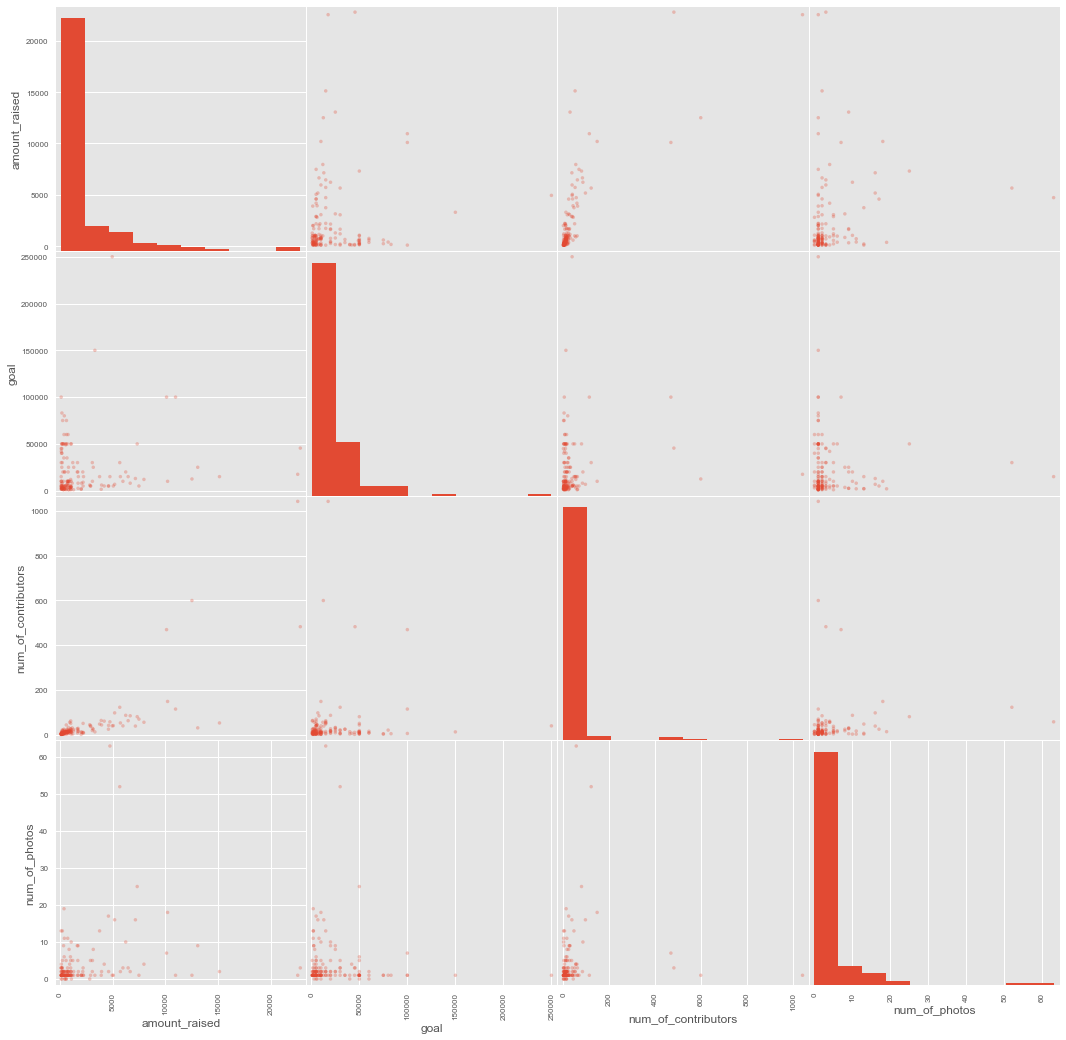

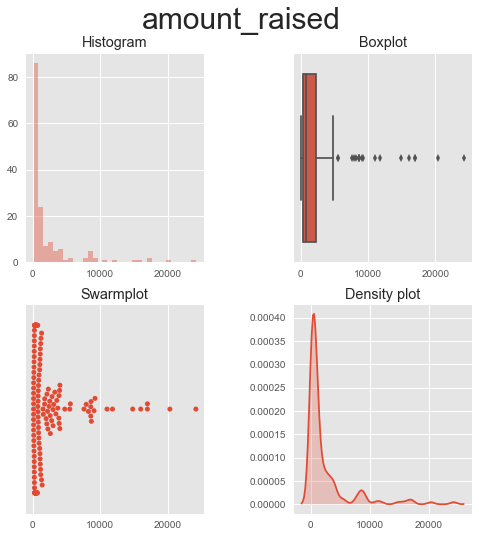

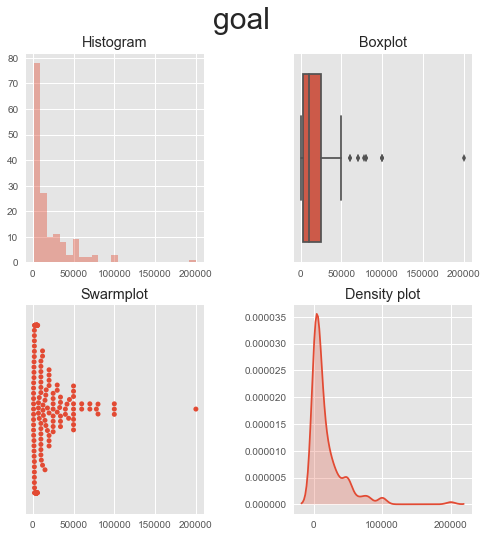

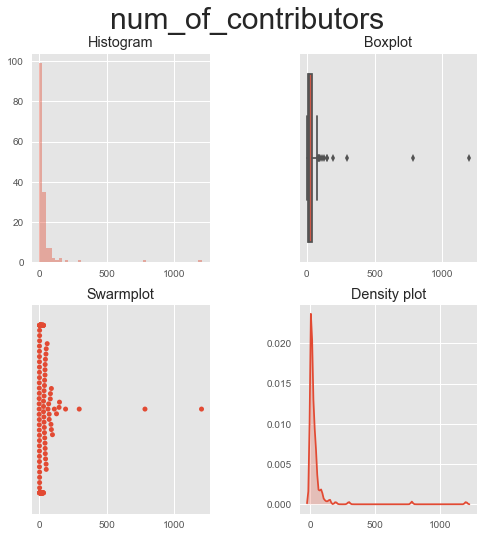

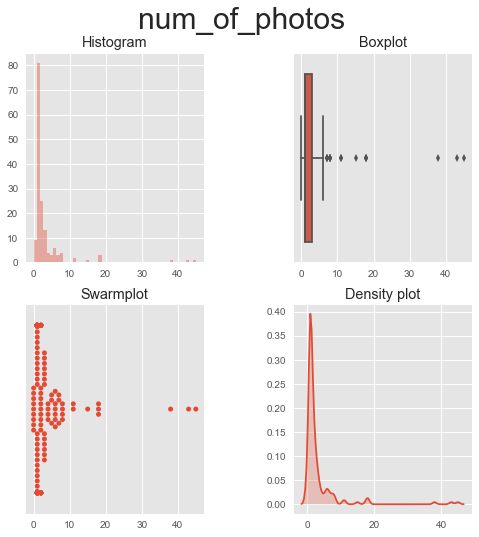

In [29]:
explore_dataset(fundrazr, 0.05, excluded_text_columns=['story', 'campaign_title', 'url'])

In [9]:
fundrazr = pd.read_csv("crowdfunding_fundrazr/crowdfunding_fundrazr/data6.csv")
fundrazr.sample(20)

,amount_raised,campaign_title,currency_type,end_date,goal,location,num_of_contributors,num_of_photos,story,url
1811,10598.0,Doug Corta Benefit Account,U.S. Dollar,NaN,25000.0,"Eagle, ID, US",44,1,This account has been started for the benefit ...,https://fundrazr.com/6icQd
1764,536.0,Its Magic (Mias Bucket List),Pound Sterling,NaN,5000.0,"Derby, GB",9,1,We are Fundraising for “Its Magic Mia’s Bucke...,https://fundrazr.com/anYF2
919,1491.0,Help Maria Gomez fight cancer.,U.S. Dollar,NaN,40000.0,"Miami, FL, US",18,1,Maria is an amazing human being that had breas...,https://fundrazr.com/fx4Lc
2642,145.0,2014 Haiti Medical Mission,U.S. Dollar,NaN,1500.0,"Port-au-Prince, HT",4,1,Being a nurse and the daughter of CJ and Betty...,https://fundrazr.com/3g762
2543,380.0,ANT & VIN'S ST. JUDE/MARIA FERRARI FUNDRAISER!,U.S. Dollar,NaN,50000.0,"Peekskill, NY, US",18,6,Anthony and Vinny have been great buddies sinc...,https://fundrazr.com/6g012
510,190.0,Mindy's Given It All To Animals and Now Needs ...,U.S. Dollar,NaN,10500.0,"Marysville, OH, US",4,8,Mindy Mallett is most generous and giving woma...,https://fundrazr.com/fortheloveofanimals
417,630.0,Giving Back to a Nurse in Need,U.S. Dollar,NaN,5000.0,"Tyler, TX, US",9,3,"My name is Jessica, and I have the pleasure of...",https://fundrazr.com/nurseinneed
1854,300.0,Help Christine in her time of NEED PLEASE,U.S. Dollar,NaN,1200.0,"Sacramento, CA, US",1,9,I am posting this in complete Desperation! Chr...,https://fundrazr.com/fqdp6
1203,735.0,Please help us find an answer for Emmanuel,Canadian Dollar,NaN,73000.0,"Halifax, NS, CA",16,1,Emmanuel is 16 months old. He was born in Port...,https://fundrazr.com/ez6K4
1553,1205.0,Help Sue Roll Home (Funds for Medical Equipment),Canadian Dollar,NaN,20000.0,"Sarnia, ON, CA",19,5,"In June, Sue VanEkeren was brought to Strathro...",https://fundrazr.com/ftRVb


# Notes
* The amount_raised and goal are in a variety of currencies
* The stories are written in a variety of languages
* A lot of campaigns have no end date
* a campaigner has uploaded 312 photos which seems strange
* We'll need to convert end_date to datetime format
* not all the unique entries need to be checked for columns such as story
* should run a count of each of the values in end_date

In [5]:
def convert_to_USD(row, column_name):
    '''
    converts currency amount to USD
    '''
    c = CurrencyRates()
    currencies = {
                  'Australian Dollar': 'AUD', 'Canadian Dollar': 'CAD', 'Euro': 'EUR', 'Hong Kong Dollar': 'HKD',
                'Israeli New Sheqel': 'ILS', 'Mexican Peso': 'MXN', 'New Zealand Dollar': 'NZD', 'Philippine Peso': 'PHP',
                 'Pound Sterling': 'GBP', 'Russian Ruble': 'RUB', 'Singapore Dollar': 'SGD', 'Thai Baht': 'THB'
                }
    if row['currency_type'] == 'U.S. Dollar':
        return row[column_name]
    else:
        return c.convert(currencies[row['currency_type']], 'USD', row[column_name])

In [6]:
fundrazr['amount_raised_USD'] = fundrazr.apply(convert_to_USD, args=('amount_raised',), axis=1)
fundrazr['goal_USD'] = fundrazr.apply(convert_to_USD, args=('goal',), axis=1)

In [7]:
fundrazr.sample(15)

,amount_raised,campaign_title,currency_type,end_date,goal,location,num_of_contributors,num_of_photos,story,url,amount_raised_USD,goal_USD
3039,140.0,Help me Help Tanzania (Gap Medics),Pound Sterling,NaN,20000.0,"Chepstow, GB",6,1,I aim to travel to Tanzania next summer with t...,https://fundrazr.com/dZxC2,182.6580,26094.0
2831,1050.0,Give the Gift of Sound,U.S. Dollar,NaN,5000.0,"Clarksville, TN, US",13,1,The sounds of the dry fall leaves rustling in ...,https://fundrazr.com/2dXLb,1050.0000,5000.0
529,830.0,Erik's Cancer Fund,U.S. Dollar,NaN,1200.0,"Bogor, West Java, ID",2,2,"Erik, first and foremost, is a father . He is ...",https://fundrazr.com/erikscancerfund,830.0000,1200.0
1359,275.0,Your help is needed,Canadian Dollar,NaN,2000.0,"Timmins, ON, CA",7,1,"Hello, my name is Patricia, and I am in need o...",https://fundrazr.com/3uIce,207.8175,1511.4
2559,955.0,Urgent Medical Assistance (Lipoma),U.S. Dollar,NaN,50000.0,"Ottawa, ON, CA",16,1,My name is Lamin Sisay and I am a Canadian cit...,https://fundrazr.com/cdfM5,955.0000,50000.0
190,540.0,Solidarity Shave-a-Thon,U.S. Dollar,NaN,10000.0,"Albuquerque, NM, US",10,1,This is Jaymie. All who know her can agree she...,https://fundrazr.com/b1M6g6,540.0000,10000.0
2275,636.0,New Born Baby with brain trauma,U.S. Dollar,NaN,10000.0,"Los Angeles, CA, US",12,2,PLEASE HELP My nephew Danny\n Crump new baby ...,https://fundrazr.com/8jOs5,636.0000,10000.0
2652,2350.0,Help Tackle Guillain–Barré Syndrome Medical Bills,U.S. Dollar,NaN,10000.0,"Louisville, KY, US",46,2,"Hey Guys, Wendy and I have been talking this o...",https://fundrazr.com/5ehra,2350.0000,10000.0
2876,1050.0,Franco Tarsitano Artist of Life Cancer FundRaiser,U.S. Dollar,NaN,10000.0,"Kenosha, WI, US",2,10,My brother Franco Tarsitano has battled a lot ...,https://fundrazr.com/bcFB3,1050.0000,10000.0
2000,725.0,Helping Matt Morris with medical bills,U.S. Dollar,NaN,8000.0,"La Vergne, TN, US",12,1,Matt is our shop supervisor at Thompson Machin...,https://fundrazr.com/4ny9f,725.0000,8000.0


In [8]:
def calculate_percentage_of_goal(row):
    '''
    calculates the percentage reached of the campaigner's goal
    '''
    
    return row['amount_raised_USD']/row['goal_USD']

In [9]:
fundrazr['percentage_of_goal_reached'] = fundrazr.apply(calculate_percentage_of_goal, axis=1)

In [10]:
fundrazr.sample(20)

,amount_raised,campaign_title,currency_type,end_date,goal,location,num_of_contributors,num_of_photos,story,url,amount_raised_USD,goal_USD,percentage_of_goal_reached
451,125.0,Gertie Desperately needs Dermatological care,U.S. Dollar,NaN,1000.0,"Peoria, US",4,2,We are Pitty Paws Bully Rescue. Most of our do...,https://fundrazr.com/e19o4f,125.0000,1000.0,0.125000
2629,380.0,Jonathan's Journey,U.S. Dollar,NaN,8000.0,"Chicago Heights, IL, US",5,1,This donation page has been created to help ra...,https://fundrazr.com/2fKS4,380.0000,8000.0,0.047500
541,3410.0,Everyone deserves the best possible chance of ...,Pound Sterling,NaN,10000.0,"Leeds, GB",111,10,"We are raising funds for Love Hope Trust, a ch...",https://fundrazr.com/2zZud,4449.0270,13047.0,0.341000
471,530.0,Support Stefanie's Chemotherapy Treatments,U.S. Dollar,NaN,1000.0,"Fresno, US",8,5,I was diagnosed in 2009 after being in the hos...,https://fundrazr.com/SupportStefaniesChemo,530.0000,1000.0,0.530000
1906,23096.0,Friends of Kellie Gundling - Your Help Needed,U.S. Dollar,NaN,50000.0,"Norman, OK, US",124,2,So many people have been touched by Kellie Gun...,https://fundrazr.com/dfjca,23096.0000,50000.0,0.461920
2747,100.0,Helping with much need dental expenses!,Canadian Dollar,NaN,5000.0,"Regina, SK, CA",1,1,Hi everyone! well my story begins about 6 yea...,https://fundrazr.com/6d1qf,75.5700,3778.5,0.020000
642,2575.0,Just $ 20 K can save young beautiful life-Marika!,U.S. Dollar,NaN,20000.0,"Flushing, US",60,1,NaN,https://fundrazr.com/b16yaf,2575.0000,20000.0,0.128750
1345,180.0,Nikki needs YOUR help!,U.S. Dollar,NaN,10000.0,"Boonville, MO, US",5,5,"For those of you who know Nikki, you are aware...",https://fundrazr.com/bS0H0,180.0000,10000.0,0.018000
827,1910.0,Geraints Walk,Pound Sterling,NaN,5000.0,"Bridgend, GB",68,0,As many of you know a few weeks back Geraint R...,https://fundrazr.com/4jDHf,2491.9770,6523.5,0.382000
319,440.0,Help my son Isaac see color with Enchroma glas...,U.S. Dollar,NaN,70000.0,"Henrietta, NY, US",6,1,WHAT IS ENCHROMA? You wouldn't believe how lac...,https://fundrazr.com/b1G182,440.0000,70000.0,0.006286


In [10]:
def detect_language(text):
    '''
    text: a string
    returns: the most likely language that the string is written in
    '''
    try:
        return langid.classify(text)[0]
    except:
        #if there is no text
        return np.nan

In [ ]:
#it turns out that the stories and campaign titles come in a variety of language
fundrazr['lang_of_story'] = fundrazr['story'].apply(detect_language)
fundrazr['lang_of_campaign_title'] = fundrazr['campaign_title'].apply(detect_language)
fundrazr.sample(20)

In [55]:
print(fundrazr.shape)
subset_fundrazr = fundrazr.iloc[:15]
subset_fundrazr

(3147, 11)


,amount_raised,campaign_title,currency_type,end_date,goal,location,num_of_contributors,num_of_photos,story,url,lang_of_campaign
0,290.0,Give Wyatt the Earth's colors for his birthday!,U.S. Dollar,NaN,50000.0,"Brenham, TX, US",4,1,WHY THIS IS IMPORTANT Over 300 million people ...,https://fundrazr.com/11Jgd5,en
1,279.0,Help Garrett See Colors,U.S. Dollar,NaN,27000.0,"Washington, DC, US",8,1,MY COLORBLIND STORY My kindergarten teacher us...,https://fundrazr.com/b1M8ma,en
2,340.0,I need help,U.S. Dollar,NaN,50000.0,"Зајечар, RS",10,6,"Могу ли добити вашу пажњу , и помоћи ? Патим о...",https://fundrazr.com/b189Y0,en
3,310.0,Help Brendan Tucker see colours!,Australian Dollar,NaN,50000.0,"Cooranbong, NSW, AU",8,1,WHAT IS ENCHROMA? Over 300 million people worl...,https://fundrazr.com/51HJed,en
4,500.0,CIDP and Menieres Disease financial help,U.S. Dollar,NaN,1000.0,"Fort Worth, US",2,5,"Hi I'm Johnny, I am an Air Force veteran. I wa...",https://fundrazr.com/81JqHe,en
5,349.0,Help Dad see his future in color,U.S. Dollar,NaN,34000.0,"Buckeye, AZ, US",3,7,"Many of you know my dad, Randy Greeson. Many o...",https://fundrazr.com/11Jbp9,en
6,1815.0,BioMats for Rain AND Dara!♥,U.S. Dollar,NaN,2200.0,"North Kingstown, US",61,20,"Hi, we are the # BCBabes from Breast Cancer Al...",https://fundrazr.com/91KC11,da
7,380.0,Help Sherwin see colors for his photography!,U.S. Dollar,NaN,52000.0,"Austin, TX, US",10,1,Who and Why? Sherwin Bartonico is an amazing p...,https://fundrazr.com/e1JzVe,en
8,5460.0,Please Help Michael Maberry a Victim of Assault,U.S. Dollar,NaN,15000.0,"Kansas City, MO, US",54,18,"I am Michael Maberry's wife, we have been marr...",https://fundrazr.com/michaelmaberryshealthfund,en
9,11225.0,Helping Jacob ~ Ewing's Sarcoma Sucks!,U.S. Dollar,NaN,2500.0,"Hermosa Beach, CA, US",88,3,Thank you for taking the time to visit this pa...,https://fundrazr.com/HelpingJacobConde,en


In [38]:
def remove_punctuation(text):
    '''
    text: a string
    returns: a string without any punctation
    '''
    words = word_tokenize(text)
    words_punc_removed = [word for word in words if word.lower() not in string.punctuation]
    return " ".join(words_punc_removed)

In [23]:
def get_only_words(text):
    '''
    text: a string
    returns: string without digits, punctuation and special characters
    '''

    return " ".join(re.findall("[a-zA-Z]+", text))

In [24]:
get_only_words("34 words in that sentence!")

'words in that sentence'

In [16]:
def expand_contractions(text):
    '''
    text: a string
    returns: a string without word contractions
    '''
    words = text.split()
    list_of_words = []
    for word in words:
        if word in contractions_list.keys():
            list_of_words.append(contractions_list[word])
        else:
            list_of_words.append(word)
            
    return " ".join(list_of_words)         
    

In [17]:
expand_contractions("we'll have to I'll wouldn't")

'we will have to I will would not'

In [18]:
expand_contractions("come on! :) geeez don't")

'come on! :) geeez do not'

In [11]:
word_tokenize("We'll I'll don't")

['We', "'ll", 'I', "'ll", 'do', "n't"]

In [6]:
print(remove_punctation("please help me!! I need you :)"))

please help me I need you


In [32]:
def remove_stopwords(text, language="english"):
    '''
    text: a string without punctation
    language: the language of the text
    returns: string without stopwords
    '''
    stopwords_ = stopwords.words(language)
    words_in_string = text.split()
    string_stopwords_removed = [word for word in words_in_string if word not in stopwords_]
    return " ".join(string_stopwords_removed)

In [33]:
print(remove_stopwords("the dog is with me forever"))

dog forever


In [34]:
def find_POS(word):
    '''
    word: a word
    returns: the part of speech of the word
    '''
    POS = nltk.pos_tag(word)[0][1]
    #adjective tags : "JJ", "JJR", "JJS"
    if POS.lower()[0] == 'j':
        return 'a'
    #adverb tags : "RB", "RBR", "RBS"
    elif POS.lower()[0] == 'r':
        return 'r'
    #verb tags: "VB", "VBD", "VBG", "VBN", "VBP", "VBZ"
    elif POS.lower()[0] == 'v':
        return 'v'
    #noun tags: "NN", "NNS", "NNP", "NNPS"
    else:
        return 'n'

In [35]:
print(find_POS("mouse"))

n


In [36]:
def lemmatizer(text):
    '''
    text: a string without punctuation
    returns: lemmatized form of the string
    '''
    lemma_words = []
    wnl = WordNetLemmatizer()
    for word in text.split():
        POS = find_POS(word)
        lemma_words.append(wnl.lemmatize(word, POS))
    return " ".join(lemma_words)    

In [37]:
def lemmatize(text):
    '''
    text: a string of words
    returns: lemmatized form of the string
    '''
    lemmatizer = WordNetLemmatizer()
    lemma_words = [lemmatizer.lemmatize(word) for word in text.split()]
    return " ".join(lemma_words)

In [4]:
print(lemmatize("I cared deeply about you"))

I cared deeply about you


In [5]:
print(lemmatize("the cats ran around the parks all night long"))

the cat ran around the park all night long


In [10]:
print(lemmatizer("the cats ran around the parks all night long"))

the cat run around the park all night long


In [25]:
print(lemmatizer("I cared deeply about you"))

I care deeply about you


# Notes
* lemmatizer() works better than lemmatize()

In [38]:
def preprocess_text(df, column_name, get_only_words_=True, remove_stopwords_=True, lemmatize=True):
    
    new_column_name = 'preprocessed_' + column_name
    df[new_column_name] = df[column_name]
    if get_only_words_:
        df[new_column_name] = df[new_column_name].apply(get_only_words) 
    if remove_stopwords_:
        df[new_column_name] = df[new_column_name].apply(remove_stopwords)
    if lemmatize:
        df[new_column_name] = df[new_column_name].apply(remove_stopwords)
    
    return df
    

In [39]:
print(preprocess_text(subset_fundrazr, 'campaign_title'))

    amount_raised                                   campaign_title  \
0           290.0  Give Wyatt the Earth's colors for his birthday!   
1           279.0                          Help Garrett See Colors   
2           340.0                                      I need help   
3           310.0                 Help Brendan Tucker see colours!   
4           500.0         CIDP and Menieres Disease financial help   
5           349.0                 Help Dad see his future in color   
6          1815.0                      BioMats for Rain AND Dara!♥   
7           380.0     Help Sherwin see colors for his photography!   
8          5460.0  Please Help Michael Maberry a Victim of Assault   
9         11225.0           Helping Jacob ~ Ewing's Sarcoma Sucks!   
10          500.0                   Anthony's Full Color Christmas   
11          390.0            Make Isaac Happy, Help Him See Color.   
12         3300.0         Raising medical operation fee for Bradly   
13          350.0   

/Users/davidbarnes/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Users/davidbarnes/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/davidbarnes/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the 

In [22]:
helphopelive = pd.read_csv("helphopelive/helphopelive/data17.csv")
helphopelive.sample(20)
helphopelive.loc[15, 'story']

'Dear Family and Friends, As many of you may know my mother, Bonnie is in need of a kidney transplant. She was diagnosed with kidney failure after having her second child at the age of 19. There had been problems with her health that went unnoticed for years. Bonnie was on dialysis three days a week which made it difficult for her to be a part of her children’s lives.  After years of being on dialysis Bonnie was finally put on the transplant list in 2002 and received the transplant on November 23, 2005.  Unfortunately her kidney rejected the transplant when I was 13. In 2011, six years after her first transplant, my mom found herself on life sustaining dialysis again. She goes to dialysis three days a week which makes her really tired. My mom needs help in order to be eligible for another kidney transplant. The transplant center is requiring $7,500 before she can be placed on the waiting list. We need donations in order to obtain this goal.  The money would be reserved for any out-of-p

In [23]:
helphopelive.shape

(1536, 7)